In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Add some physical examples to motivate root finding. Just using algebraic examples up to this point.

#Solving Algebraic Equations: Root-finding Methods

Solving a linear equation (e.g. $y=mx+b$) is one of the first topic one encounters in any sort of introductory algebra course. This of course can be done by hand quite easily. One of course then moves onto more sophisticated equations involving terms like $x^2,x^3,\ldots$. For example, the equation $$x^2+10x+9=0$$ can be solved using the familiar quadratic formula $x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$ where $a=1$, $b=10$, and $c=9$. Applying the quadratic formula, we see that $x=-1,-9$. When we plot the function $f(x)=x^2+10x+9$, we can see that $f=0$ at $x=-1$ and $x=-9$. 

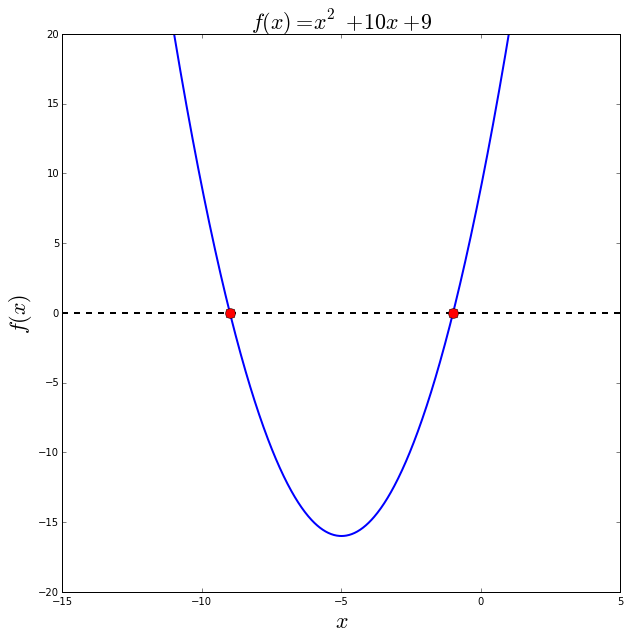

In [20]:
x=np.linspace(-15,5,1000)
x_zeros=[-1,-9]
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,0*x,'--k',linewidth=2.0)
ax.plot(x,x**2+10*x+9,linewidth=2.0)
ax.plot(x_zeros,[0,0],'ro',markersize=10)
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$f(x)$',fontsize=22)
ax.set_title(r'$f(x)=x^2+10x+9$',fontsize=22)
ax.set_ylim([-20,20])
plt.show()

These types of equations, often referred to as polynomials, can also be solved through factorization. For example, the equation $$x^3+6x^2+11x+6=0$$ can be rewritten as $$(x+1)(x+2)(x+3)=0$$ such that $x=-1,-2,-3$ are all roots of the equation. Again, let's plot the function and the roots to check our answer.

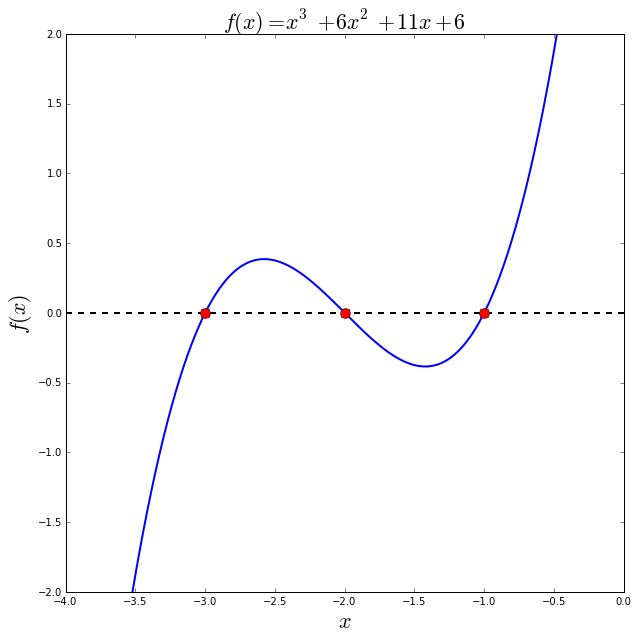

In [21]:
x=np.linspace(-4,0,1000)
x_zeros=[-1,-2,-3]
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,0*x,'--k',linewidth=2.0)
ax.plot(x,x**3+6*x**2+11*x+6,linewidth=2.0)
ax.plot(x_zeros,[0,0,0],'ro',markersize=10)
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$f(x)$',fontsize=22)
ax.set_title(r'$f(x)=x^3+6x^2+11x+6$',fontsize=22)
ax.set_ylim([-2,2])
plt.show()

Note also that finding the value of $x$ where $f(x)=0$ is the just as easy as finding the value of $x$ where $f(x)=a$, where $a$,a constant, is some value of $f$. This is because $f(x)=a$ can be rewritten as $f(x)-a=0$. Thus, we can rewrite $f(x)=a$ as a root-finding problem $g(x)=0$ where $g(x)=f(x)-a$.

So far, we've only considered the case of finding roots of polynomials. In these cases, we could always find the roots using either the quadratic formula (when our leading term was $x^2$) or a factorization method when possible. But what if our function is more complicated, say $f(x)=2x^2\sin(x)+\ln(x)$, or better yet, what if our function is unknown altogether? Often, we resort to **root finding algorithms** where we make a first guess about the root of our function and then repeatedly refine our guess until we have a reasonably accurate estimate of the root.

##Bisection Method

One of the most popular root-finding methods is known as the **bisection method**. In order to apply the bisection method, there are two important requirements:

1. the function $f$ must be _monotonically increasing (or decreasing)_ between $x=a$ and $x=b$, 
2. between $f(x=a)$ and $f(x=b)$, $f(x)=0$ for some value of $x=x_0$ such that $a<x_0<b$.

Let's consider what both of these conditions actually mean. Consider a function $f$ that is _monotonically increasing (or decreasing)_ from $x=a$ to $x=b$. This is just a fancy way of saying that as we move from $a$ to $b$, $f$ **only** increases (or **only** decreases). For example, the above function ($f(x)=x^3+6x^2+11x+6$) is neither monotonically increasing or decreasing on the interval shown, $x\in[-4,0]$. However, from $x=-4$ to $x=-2-\sqrt{3}/3$, the function increases, from $x=-2-\sqrt{3}/3$ to $x=-2+\sqrt{3}/3$ the function decreases, and then from $x=-2+\sqrt{3}/3$ to $x=0$, the function increases. Thus, when applying our bisection method, we must use it on each of these intervals individually. Lets consider the middle interval, $x\in[-2-\sqrt{3}/3,-2+\sqrt{3}/3]$.

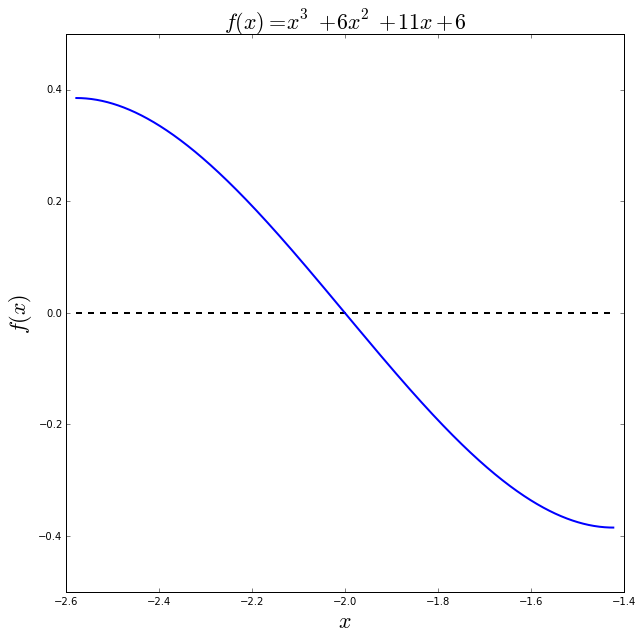

In [22]:
xzoom = np.linspace(-2.0-np.sqrt(3.0)/3.0,-2.0+np.sqrt(3.0)/3.0,1000)
def cubic_func(x):
    return x**3+6*x**2+11*x+6
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(xzoom,0*xzoom,'--k',linewidth=2.0)
ax.plot(xzoom,cubic_func(xzoom),linewidth=2.0)
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$f(x)$',fontsize=22)
ax.set_title(r'$f(x)=x^3+6x^2+11x+6$',fontsize=22)
ax.set_ylim([-.5,.5])
plt.show()

Let's call $a=-2.3$ and $b=-1.5$. Looking at the above figure, we can see that between $f(a)$ and $f(b)$, $f=0$ (i.e. the blue curve intersects the black dotted line). Thus, we have also satisfied the second condition for applying the bisection method to find the roots of our function. Now that we've shown that conditions for applying the bisection method are satisfied, how exactly does the method work?